In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
# Display plots inline and change plot resolution to retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Set Seaborn aesthetic parameters to defaults
sns.set()
print('Setup Complete')

Setup Complete


In [33]:
def load_data():
    #load the dataset
    #return the dataset
    iris_data = datasets.load_iris()
    return iris_data

In [7]:
#dataset

In [34]:
dataset = load_data()

In [35]:
def dataset_to_pandas():
    #put the dataset into a pandas DF using the feature names as columnsç
    #rename the column name so the dont include the '(cm)'
    #add 2 columns one with the target and another with the target_names
    
    df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width']
    df['target'] = dataset['target']
    df['class'] = dataset.target_names[dataset.target]

    #df['class'] = pd.Categorical.from_codes(dataset.target, dataset.target_names) #Make a Categorical type from codes and categories or dtype.
    #here the codes are the target values and the dtype will be target_names
    return df

In [36]:
df_iris = dataset_to_pandas()
df_iris

,sepal length,sepal width,petal length,petal width,target,class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [37]:
X,y = df_iris.iloc[:,:4], df_iris.iloc[:,4]

In [38]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [18]:
# Starnd Scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled[:5]

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

In [20]:
#Model implementation

model = DecisionTreeClassifier()
train = model.fit(X_train_scaled, y_train)

In [22]:
prediction = train.predict(X_test_scaled)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
y_pred = model.predict(X_test_scaled)
metric = confusion_matrix(prediction,y_test)
report = classification_report(prediction,y_test)

print(metric)
print(report)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Accuracy: 1.0


In [26]:
metric

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [4]:
car_names_df = pd.read_table('car.names', header=None)
col_names = [ 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'condition']
df1 = pd.read_csv('car.data', names = col_names, header=None, index_col= False)
#car.index= range(len(car))

In [5]:
car.buying = car.buying.apply(lambda x: list(car.buying.unique()).index(x))
car.maint = car.maint.apply(lambda x: list(car.maint.unique()).index(x))
car.doors = car.doors.apply(lambda x: list(car.doors.unique()).index(x))
car.persons = car.persons.apply(lambda x: list(car.persons.unique()).index(x))
car.lug_boot = car.lug_boot.apply(lambda x: list(car.lug_boot.unique()).index(x))
car.safety = car.safety.apply(lambda x: list(car.safety.unique()).index(x))
car.class_ = car.class_.apply(lambda x: list(car.class_.unique()).index(x))
car.head(10)
#car.buying.unique()

NameError: name 'car' is not defined

In [4]:
df1.buying = df1.buying.apply(lambda x: list(df1.buying.unique())[::-1].index(x))
df1.maint = df1.maint.apply(lambda x: list(df1.maint.unique())[::-1].index(x))
df1.doors = df1.doors.apply(lambda x: list(df1.doors.unique())[::-1].index(x))
df1.persons = df1.persons.apply(lambda x: list(df1.persons.unique())[::-1].index(x))
df1.lug_boot = df1.lug_boot.apply(lambda x: list(df1.lug_boot.unique())[::-1].index(x))
df1.safety = df1.safety.apply(lambda x: list(df1.safety.unique())[::-1].index(x))
df1.condition = df1.condition.apply(lambda x: list(df1.condition.unique())[::-1].index(x))

df1.head(10)

,buying,maint,doors,persons,lug_boot,safety,condition
0,3,3,3,2,2,2,3
1,3,3,3,2,2,1,3
2,3,3,3,2,2,0,3
3,3,3,3,2,1,2,3
4,3,3,3,2,1,1,3
5,3,3,3,2,1,0,3
6,3,3,3,2,0,2,3
7,3,3,3,2,0,1,3
8,3,3,3,2,0,0,3
9,3,3,3,1,2,2,3


In [134]:
car.index= range(len(car))
#car.sample(20)

In [22]:
X,y = df1.iloc[:, 1:], df1.iloc[:,0]

In [9]:
X.head(10)

,maint,doors,persons,lug_boot,safety,condition
0,3,3,2,2,2,3
1,3,3,2,2,1,3
2,3,3,2,2,0,3
3,3,3,2,1,2,3
4,3,3,2,1,1,3
5,3,3,2,1,0,3
6,3,3,2,0,2,3
7,3,3,2,0,1,3
8,3,3,2,0,0,3
9,3,3,1,2,2,3


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

model = RandomForestClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3)*100)


[[386   0]
 [  0 133]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       386
           1       1.00      1.00      1.00       133

    accuracy                           1.00       519
   macro avg       1.00      1.00      1.00       519
weighted avg       1.00      1.00      1.00       519

Accuracy: 100.0


In [15]:
dummy_df = pd.DataFrame()

In [7]:
car_names_df = pd.read_table('car.names', header=None)
col_names = [ 'buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'condition']
df1 = pd.read_csv('car.data', names = col_names, header=None, index_col= False)
#dummy_df = pd.get_dummies(df1, columns=["maint","doors","persons",'lug_boot','safety','condition'] )






In [6]:
dummy_df

,buying,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,condition_acc,condition_good,condition_unacc,condition_vgood
0,vhigh,0,0,0,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
1,vhigh,0,0,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
2,vhigh,0,0,0,1,1,0,0,0,1,...,0,0,1,1,0,0,0,0,1,0
3,vhigh,0,0,0,1,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,vhigh,0,0,0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,low,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1724,low,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
1725,low,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1726,low,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0


In [63]:
dummy_df.buying = dummy_df.buying.apply(lambda x: list(dummy_df.buying.unique()).index(x))
dummy_df.sample(5)

,buying,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,doors_4,doors_5more,persons_2,...,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med,condition_acc,condition_good,condition_unacc,condition_vgood
391,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1349,3,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
786,1,0,1,0,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
908,2,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
418,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0


In [11]:
X,y = dummy_df.iloc[:, 1:], dummy_df.iloc[:,0]

In [70]:
y.sample(5)

168     0
1150    2
9       0
188     0
1636    3
Name: buying, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

model = RandomForestClassifier()
clf = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix
print(cm(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:",round(metrics.accuracy_score(y_test, y_pred),3)*100)


[[ 3 35 43 52]
 [32 18 61 24]
 [41 54  7 22]
 [58 27 31 11]]
              precision    recall  f1-score   support

        high       0.02      0.02      0.02       133
         low       0.13      0.13      0.13       135
         med       0.05      0.06      0.05       124
       vhigh       0.10      0.09      0.09       127

    accuracy                           0.08       519
   macro avg       0.08      0.07      0.08       519
weighted avg       0.08      0.08      0.08       519

Accuracy: 7.5


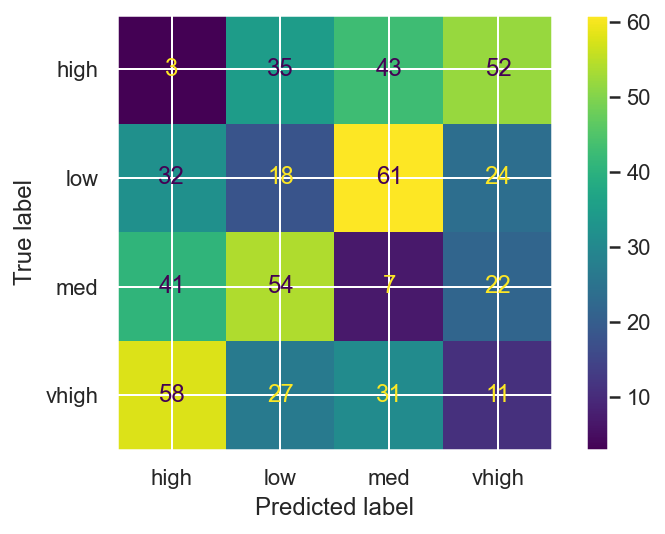

In [19]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

In [17]:
clf

RandomForestClassifier()